The **[Boston Housing Prices Dataset](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html)** consists of price of houses in various places in Boston.  
Alongside with price, the dataset also provide theses informations : 

 - CRIM: This is the per capita crime rate by town
 - ZN: This is the proportion of residential land zoned for lots larger than 25,000 sq.ft
 - INDUS: This is the proportion of non-retail business acres per town
 - CHAS: This is the Charles River dummy variable (this is equal to 1 if tract bounds river; 0 otherwise)
 - NOX: This is the nitric oxides concentration (parts per 10 million)
 - RM: This is the average number of rooms per dwelling
 - AGE: This is the proportion of owner-occupied units built prior to 1940
 - DIS: This is the weighted distances to five Boston employment centers
 - RAD: This is the index of accessibility to radial highways
 - TAX: This is the full-value property-tax rate per 10,000 dollars
 - PTRATIO: This is the pupil-teacher ratio by town
 - B: This is calculated as 1000(Bk — 0.63)^2, where Bk is the proportion of people of African American descent by town
 - LSTAT: This is the percentage lower status of the population
 - MEDV: This is the median value of owner-occupied homes in 1000 dollars
## What we're going to do :

 - Retrieve data
 - Preparing the data
 - Build a model
 - Train the model
 - Evaluate the result


## 1 - Imports

In [156]:
import tensorflow
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from plot_keras_history import plot_history

## 2 - Récupérer les données

In [157]:
data = pd.read_csv("../databases/BostonHousing.csv",header=0)
display(data.head(5).style.format("{0:.2f}").set_caption("Few lines of the dataset :"))
print('Missing Data : ',data.isna().sum().sum(), '  Shape is : ', data.shape)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.01,18.00,2.31,0.00,0.54,6.58,65.20,4.09,1.00,296.00,15.30,396.90,4.98,24.00
1,0.03,0.00,7.07,0.00,0.47,6.42,78.90,4.97,2.00,242.00,17.80,396.90,9.14,21.60
2,0.03,0.00,7.07,0.00,0.47,7.18,61.10,4.97,2.00,242.00,17.80,392.83,4.03,34.70
3,0.03,0.00,2.18,0.00,0.46,7.00,45.80,6.06,3.00,222.00,18.70,394.63,2.94,33.40
4,0.07,0.00,2.18,0.00,0.46,7.15,54.20,6.06,3.00,222.00,18.70,396.90,5.33,36.20


Missing Data :  0   Shape is :  (506, 14)


## 3 - Préparation des données

### 3.1 Séparer les données

80% pour train - 20% pour test

x -> input data

y -> expected output

In [158]:
# ---- Suffle and Split => train, test

data_train = data.sample(frac=0.7, axis=0) # peut être fait avec n = 'nombre de données voulues'
data_test  = data.drop(data_train.index) # retire les données choisies

# ---- Split => x,y (medv is price)
#
x_train = data_train.drop('medv',  axis=1)
y_train = data_train['medv'] 
x_test  = data_test.drop('medv',   axis=1)
y_test  = data_test['medv']


print('Original data shape was : ',data.shape)
print('x_train : ',x_train.shape, 'y_train : ',y_train.shape)
print('x_test  : ',x_test.shape,  'y_test  : ',y_test.shape)


Original data shape was :  (506, 14)
x_train :  (354, 13) y_train :  (354,)
x_test  :  (152, 13) y_test  :  (152,)


### 3.2 - Data normalization
**Note :** 
 - All input data must be normalized, train and test.  
 - To do this we will **subtract the mean** and **divide by the standard deviation**.  
 - But test data should not be used in any way, even for normalization.  
 - The mean and the standard deviation will therefore only be calculated with the train data.

In [159]:
display(x_train.describe().style.format("{0:.2f}").set_caption("Before normalization :"))

mean = x_train.mean()
std  = x_train.std()
x_train = (x_train - mean) / std
x_test  = (x_test  - mean) / std

display(x_train.describe().style.format("{0:.2f}").set_caption("After normalization :"))
display(x_train.head(5).style.format("{0:.2f}").set_caption("Few lines of the dataset :"))

x_train, y_train = np.array(x_train), np.array(y_train)
x_test,  y_test  = np.array(x_test),  np.array(y_test)


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
count,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00
mean,3.74,10.04,11.53,0.06,0.56,6.28,69.41,3.71,9.64,411.26,18.48,358.24,12.74
std,9.09,21.71,6.91,0.25,0.12,0.69,27.91,2.03,8.76,169.47,2.10,89.31,7.05
min,0.01,0.00,0.46,0.00,0.39,3.56,2.90,1.13,1.00,188.00,12.60,0.32,1.73
25%,0.08,0.00,5.64,0.00,0.45,5.89,47.45,2.05,4.00,281.00,17.40,374.83,7.04
50%,0.28,0.00,9.90,0.00,0.54,6.21,79.05,3.12,5.00,341.00,19.00,391.57,11.43
75%,3.75,0.00,18.10,0.00,0.63,6.63,94.07,4.94,24.00,666.00,20.20,396.76,17.16
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,10.71,24.00,711.00,22.00,396.90,36.98


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
count,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00
mean,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.41,-0.46,-1.60,-0.26,-1.40,-3.96,-2.38,-1.27,-0.99,-1.32,-2.80,-4.01,-1.56
25%,-0.40,-0.46,-0.85,-0.26,-0.88,-0.57,-0.79,-0.82,-0.64,-0.77,-0.51,0.19,-0.81
50%,-0.38,-0.46,-0.24,-0.26,-0.18,-0.09,0.35,-0.29,-0.53,-0.41,0.25,0.37,-0.19
75%,0.00,-0.46,0.95,-0.26,0.60,0.51,0.88,0.60,1.64,1.50,0.82,0.43,0.63
max,9.37,4.14,2.35,3.79,2.61,3.65,1.10,3.45,1.64,1.77,1.67,0.43,3.44


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
349,-0.41,1.38,-1.49,-0.26,-1.09,0.96,-1.25,2.50,-0.99,-0.45,0.58,0.35,-0.97
461,-0.01,-0.46,0.95,-0.26,1.29,0.14,0.68,-0.56,1.64,1.50,0.82,0.37,0.27
224,-0.38,-0.46,-0.77,-0.26,-0.47,2.90,0.32,-0.40,-0.19,-0.62,-0.51,0.30,-1.22
111,-0.40,-0.46,-0.22,-0.26,-0.10,0.64,0.44,-0.51,-0.42,0.12,-0.32,0.42,-0.37
458,0.44,-0.46,0.95,-0.26,1.29,0.04,0.51,-0.46,1.64,1.50,0.82,-0.96,0.49


# Step 4 - Build a model
About informations about : 
 - [Optimizer](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)
 - [Activation](https://www.tensorflow.org/api_docs/python/tf/keras/activations)
 - [Loss](https://www.tensorflow.org/api_docs/python/tf/keras/losses)
 - [Metrics](https://www.tensorflow.org/api_docs/python/tf/keras/metrics)

In [160]:
def get_model_v1(shape):
    model = keras.models.Sequential()
    model.add(keras.layers.Input(shape, name="InputLayer"))
    model.add(keras.layers.Dense(32, activation='relu', name='Dense_n1')) # 32 -> nombre de neuronnes
    model.add(keras.layers.Dense(64, activation='relu', name='Dense_n2'))
    model.add(keras.layers.Dense(32, activation='relu', name='Dense_n3'))
    model.add(keras.layers.Dense(1, name='Output'))
    model.compile(optimizer = 'adam', 
                  loss      = 'mse',
                  metrics   = ['mae', 'mse'] )
    return model

## Step 5 - Train the model
### 5.1 - Get it

In [161]:
model=get_model_v1( (13,) ) # 14 moins le prix donc 13 

model.summary()

#img=keras.utils.plot_model( model, to_file='./run/model.png', show_shapes=True, show_layer_names=True, dpi=96)
#display(img)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Dense_n1 (Dense)             (None, 32)                448       
_________________________________________________________________
Dense_n2 (Dense)             (None, 64)                2112      
_________________________________________________________________
Dense_n3 (Dense)             (None, 32)                2080      
_________________________________________________________________
Output (Dense)               (None, 1)                 33        
Total params: 4,673
Trainable params: 4,673
Non-trainable params: 0
_________________________________________________________________


### 5.2 Train it

In [162]:
history = model.fit(x_train,
                    y_train,
                    epochs          = 60,
                    batch_size      = 10,
                    verbose         = 0,
                    validation_data = (x_test, y_test))

## Step 6 - Evaluate
### 6.1 - Model evaluation
MAE =  Mean Absolute Error (between the labels and predictions)  
A mae equal to 3 represents an average error in prediction of $3k.

In [163]:
score = model.evaluate(x_test, y_test, verbose=1)

print('x_test / loss      : {:5.4f}'.format(score[0]))
print('x_test / mae       : {:5.4f}'.format(score[1]))
print('x_test / mse       : {:5.4f}'.format(score[2]))

152/152 [==============================] - 0s 120us/sample - loss: 9.7571 - mean_absolute_error: 2.4192 - mean_squared_error: 9.7571
x_test / loss      : 9.7571
x_test / mae       : 2.4192
x_test / mse       : 9.7571


### 6.2 - Training history
What was the best result during our training ?

In [177]:
df=pd.DataFrame(data=history.history)
display(df.head().style.format("{0:.2f}").set_caption("Début du training:"))
display(df.tail().style.format("{0:.2f}").set_caption("Fin du training :"))

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error
0,557.94,21.80,557.94,550.88,21.32,550.88
1,409.89,17.86,409.89,255.62,13.28,255.62
2,127.16,8.64,127.16,64.00,6.19,64.00
3,52.64,5.26,52.64,33.62,4.30,33.62
4,34.23,4.10,34.23,23.95,3.61,23.95


,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error
55,7.17,1.97,7.17,9.42,2.27,9.42
56,7.00,1.91,7.00,9.62,2.31,9.62
57,6.57,1.85,6.57,9.66,2.44,9.66
58,6.47,1.83,6.47,8.92,2.28,8.92
59,6.32,1.77,6.32,9.76,2.42,9.76


In [178]:
print("min( val_mae ) : {:.4f}".format( min(df["val_mean_absolute_error"]) ) )

min( val_mae ) : 2.2715


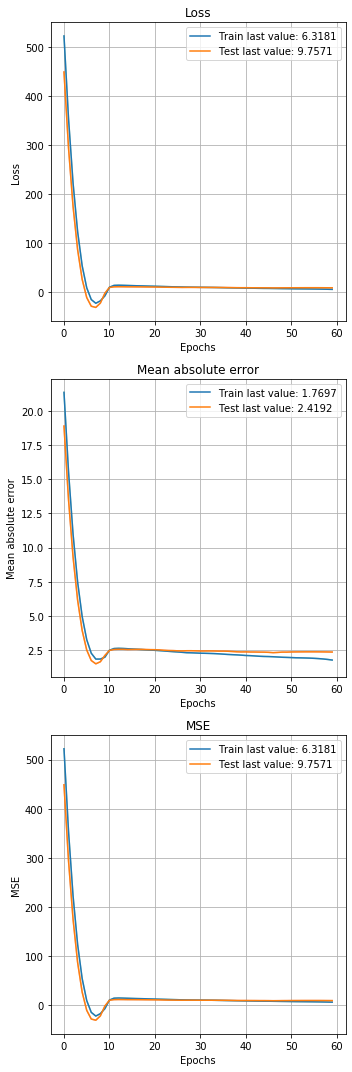

In [179]:
plot_history(df , style="-" , interpolate = True , graphs_per_row = 1)

## Step 7 - Make a prediction
The data must be normalized with the parameters (mean, std) previously used.

In [167]:
my_data = [ 1.26425925, -0.48522739,  1.0436489 , -0.23112788,  1.37120745,
       -2.14308942,  1.13489104, -1.06802005,  1.71189006,  1.57042287,
        0.77859951,  0.14769795,  2.7585581 ]

real_price = 10.4

my_data=np.array(my_data).reshape(1,13)

In [185]:
predictions = model.predict( my_data )


print("Prediction : {:.2f} K$".format(predictions[0][0]))
print("Reality    : {:.2f} K$".format(real_price))

Prediction : 10.53 K$
Reality    : 10.40 K$


In [193]:
print("Weights and biases of the layers after training the model: \n")
for layer in model.layers:
    print("Layer : " , layer.name)
    print("Weights : ",layer.get_weights()[0].shape)
    print(layer.get_weights()[0])
    print("Bias")
    print("Shape: ",layer.get_weights()[1].shape,'\n',layer.get_weights()[1],'\n')

Weights and biases of the layers after training the model: 

Layer :  Dense_n1
Weights :  (13, 32)
[[ 2.79552072e-01 -2.80682415e-01 -3.89550060e-01  7.54661188e-02
  -4.49846029e-01 -3.65552381e-02  1.41453341e-01 -8.50464106e-02
  -9.05710384e-02  9.64535475e-02 -1.62340492e-01  1.46294814e-02
  -9.13990289e-02 -3.48970562e-01  1.42643645e-01 -5.05863607e-01
   1.49191260e-01 -4.13125694e-01  2.67992079e-01  6.81307986e-02
  -3.75822723e-01 -7.45306388e-02 -2.04042979e-02  1.36528626e-01
  -2.23209202e-01  2.67932624e-01  1.82360172e-01  2.25910217e-01
   2.69023329e-01 -1.84264057e-03 -1.23859732e-03 -9.89894345e-02]
 [ 1.87583398e-02  8.12003613e-02  3.69720131e-01 -1.30505383e-01
   1.26902789e-01  1.20569959e-01 -1.15012825e-02  1.39357299e-01
  -2.79684752e-01 -2.95362826e-02 -1.93547308e-02  1.82982475e-01
  -3.14040601e-01  8.33352283e-02 -3.67625862e-01  3.12426865e-01
   6.28241450e-02 -1.15704291e-01  2.34889477e-01  1.40992716e-01
  -5.01886383e-02 -2.03005433e-01  7.32774

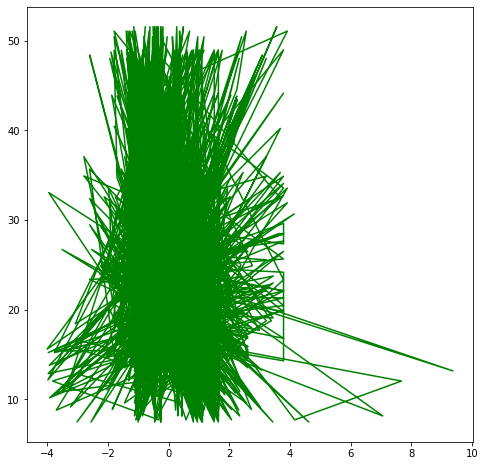

In [197]:
plt.figure(figsize = (8,8))
plt.plot(x_train,model.predict(x_train),'g')
plt.show()